# Support Vector Regression (SVR)



## Importing the libraries

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [62]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

## Feature Scaling

In [63]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
sc_Y = StandardScaler()

y_2d = y.reshape(len(y), 1)
X_scaled = sc_X.fit_transform(X)
y_scaled_2d =  sc_Y.fit_transform(y_2d)
y_scaled = y_scaled_2d.reshape(len(y))


## Training the SVR model on the whole dataset

In [64]:
from sklearn.svm import SVR

regressor = SVR(kernel='rbf')
regressor.fit(X=X_scaled, y=y_scaled)

SVR()

## Predicting a new result

In [65]:
input_level = 6.5
predict_input = [[input_level]]
scaled_predict_input = sc_X.fit_transform(predict_input)
scaled_predict_output = regressor.predict(scaled_predict_input)
result = sc_Y.inverse_transform([scaled_predict_output])

output_salary = result[0][0]
print(f"{output_salary:.2f}")

131106.77


## Visualising the SVR results

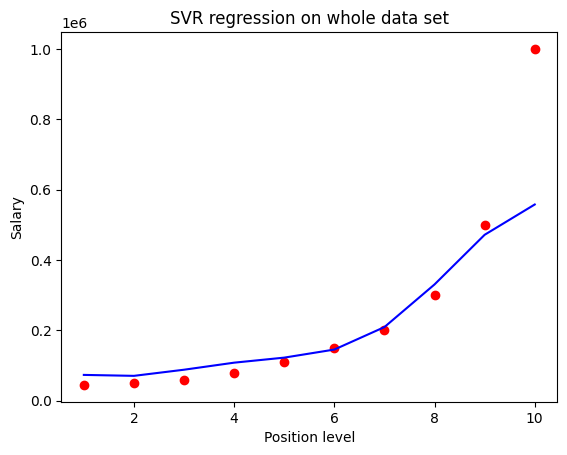

In [69]:
plt.scatter(x=X, y=y, color="red")
# since regressor works with scaled X and y
plt.plot(X, sc_Y.inverse_transform(regressor.predict(X=X_scaled).reshape(len(X_scaled), 1)), color="blue")
plt.title("SVR regression on whole data set")
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

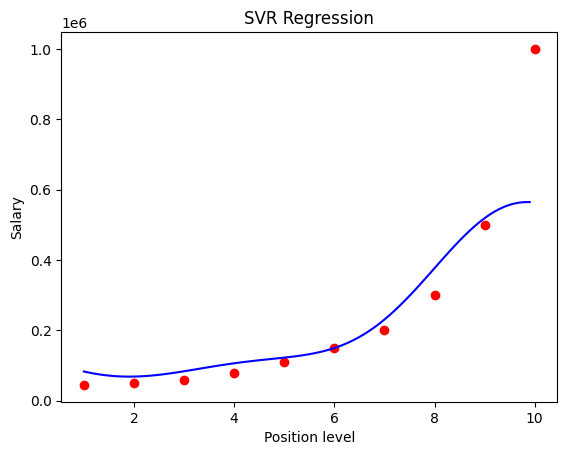

In [72]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
X_grid_scaled = sc_X.fit_transform(X_grid)
plt.scatter(x=X, y=y, color="red")
plt.plot(
    X_grid, sc_Y.inverse_transform(regressor.predict(X=X_grid_scaled).reshape(len(X_grid_scaled), 1)), color="blue"
)
plt.title("SVR Regression")
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()